# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Extracting C:\Users\Mohammed/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\Mohammed/.pytorch/F_MNIST_data/FashionMNIST\raw


Extracting C:\Users\Mohammed/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\Mohammed/.pytorch/F_MNIST_data/FashionMNIST\raw


Extracting C:\Users\Mohammed/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\Mohammed/.pytorch/F_MNIST_data/FashionMNIST\raw


Extracting C:\Users\Mohammed/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\Mohammed/.pytorch/F_MNIST_data/FashionMNIST\raw
Processing...



..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!


Here we can see one of the images.

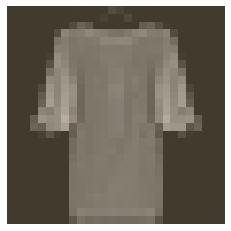

In [5]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [7]:
from torch import optim
from torch import nn

In [30]:
# TODO: Define your network architecture here
layer0 = 784
layer1 = 256
layer2 = 128
layer3 = 64
layer4 = 32
output_layer = 10
my_model = nn.Sequential(
    nn.Linear(layer0, layer1),
    nn.ReLU(),
    nn.Linear(layer1, layer2),
    nn.ReLU(),
    nn.Linear(layer2, layer3),
    nn.ReLU(),
    nn.Linear(layer3, layer4),
    nn.ReLU(),
    nn.Linear(layer4, output_layer),
    nn.LogSoftmax(dim=1),  
)
my_model.cuda()

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): ReLU()
  (8): Linear(in_features=32, out_features=10, bias=True)
  (9): LogSoftmax()
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [49]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(my_model.parameters())
epoch = 10

In [50]:
# TODO: Train the network here
for e in range(epoch):
    total_loss =  0
    
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        images = images.view(images.shape[0], -1)
        outputs = my_model.forward(images.cuda())
        loss = criterion(outputs, labels.cuda())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
    else:
        with torch.no_grad():
            total_acc = 0
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                outputs = my_model.forward(images.cuda())
                
                prob_outputs = torch.exp(outputs)
                top_p, top_class = torch.topk(prob_outputs, 1, dim=1)
                correct = top_class == labels.view(*top_class.shape).cuda()
                acc = torch.mean(correct.type(torch.FloatTensor))
                total_acc += acc
                
                
        print(f"Training loss: {total_loss/len(trainloader)}",
             f"Testing acc: {total_acc/len(testloader)}")
        

Training loss: 0.15825940287117957 Testing acc: 0.8855493664741516
Training loss: 0.15340320568984506 Testing acc: 0.8826631903648376
Training loss: 0.1490605051464427 Testing acc: 0.8850517272949219
Training loss: 0.14265671056280257 Testing acc: 0.8929139971733093
Training loss: 0.1368818975059685 Testing acc: 0.8881369233131409
Training loss: 0.13538588910723037 Testing acc: 0.8934116363525391
Training loss: 0.12950847548510092 Testing acc: 0.8828622698783875
Training loss: 0.12561142005161371 Testing acc: 0.8932125568389893
Training loss: 0.11944293330655868 Testing acc: 0.8890326619148254
Training loss: 0.11704293116609425 Testing acc: 0.8871417045593262


tensor(8)


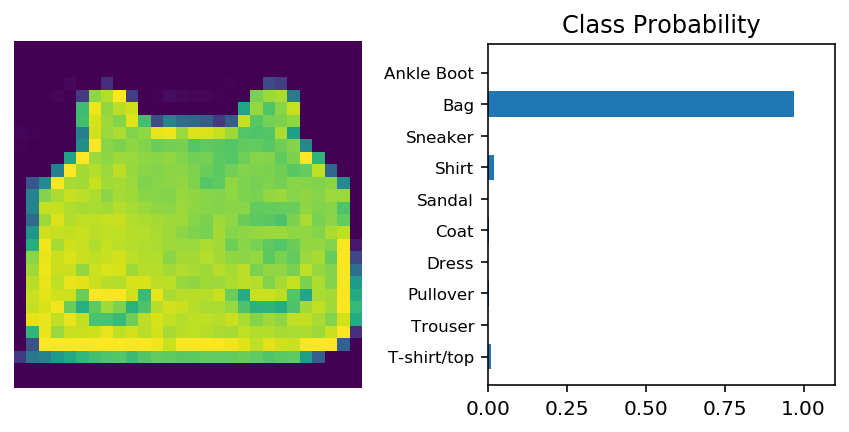

In [45]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
label = labels[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(my_model.forward(img.cuda()))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps.cpu(), version='Fashion')
print(label)